<a href="https://colab.research.google.com/github/djboudia/milestone/blob/main/code/dave_Sentence_Embedding_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import spacy
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='ix')
train['lemmatized_text'] = train['lemmatized_text'].fillna('')

In [8]:
sample_df = train.groupby('label').apply(lambda x: x.sample(100, random_state=99))

In [9]:
sample_df.label.value_counts()

0    100
1    100
Name: label, dtype: int64

In [10]:
nlp = spacy.load("en_core_web_sm")

In [51]:
nlp("hello").vector

array([-0.2941795 ,  1.5272205 , -0.4683753 , -1.8280268 , -0.74592257,
        0.6092551 , -0.8355911 ,  0.7906867 ,  1.045971  , -0.6345818 ,
       -1.7085754 ,  0.01963254, -0.38694516, -0.5170162 , -0.02926812,
       -0.02439508, -0.1038921 , -0.79197043,  0.68297803, -1.392732  ,
       -0.13546929, -0.5550416 , -0.2953764 ,  1.9752024 ,  1.1682112 ,
        1.0081902 , -0.27417094,  0.07946961,  1.2316859 , -0.89663047,
        0.00315231,  0.59060776,  1.2002959 , -0.31095332, -0.4725518 ,
        1.4017552 , -0.77239996,  0.96849704,  0.43788937,  0.3952584 ,
       -0.22612579,  0.02860118,  1.6635642 , -0.16189456, -0.6866143 ,
       -0.4621243 ,  0.69297665,  0.4818843 ,  0.24375269, -1.3171694 ,
       -0.6073364 , -2.0163002 , -0.7114007 , -0.86640716,  1.2473066 ,
        0.12987283, -1.5047197 , -0.17922944,  0.64802176,  0.9489882 ,
       -0.0382005 ,  0.93950033,  1.1077173 , -1.5541037 ,  0.5939657 ,
        0.09965324,  0.33008885,  0.0321556 ,  0.78923154, -0.36

In [54]:
sample_df['embedding'] =  sample_df['lemmatized_text'].apply(lambda x: nlp(x).vector)

In [61]:
from numpy import loadtxt

embeddings = loadtxt('drive/Shareddrives/Milestone 2/embeddings.csv', delimiter=',')
embeddings

array([[-0.10521097,  0.04652381,  0.09932816, ..., -0.53146267,
         0.24081262,  0.04764764],
       [-0.09595645,  0.28408318,  0.0416585 , ..., -0.6049515 ,
         0.23389882,  0.2116979 ],
       [ 0.00624134,  0.04496894,  0.28006756, ..., -0.21483139,
         0.40460399, -0.12047322],
       ...,
       [-0.05062665,  0.11346165,  0.37695   , ..., -0.35318942,
         0.46983531, -0.04529605],
       [-0.13691955,  0.46627818, -0.0528408 , ..., -0.55561154,
         0.56975963,  0.25214309],
       [-0.23494626,  0.30814424,  0.28275521, ..., -0.56363898,
         0.44196188,  0.01724233]])

In [58]:
train

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
ix,,,,,,,,,,,
0,There is manuscript evidence that Austen conti...,there be manuscript evidence that austen conti...,8.236551,5.809310,3.57,12.12,2.495517,1.33,4.57,37.0,1
1,"In a remarkable comparative analysis , Mandaea...",in a remarkable comparative analysis mandaean ...,12.320171,7.499286,2.89,11.94,2.251429,1.46,3.77,21.0,1
2,"Before Persephone was released to Hermes , who...",before persephone be release to hermes who hav...,6.594628,5.231351,2.78,11.17,2.537222,1.43,4.86,42.0,1
3,Cogeneration plants are commonly found in dist...,cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.429643,1.52,4.93,32.0,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",geneva lrb rrb be the secondmostpopulous city ...,9.847729,5.455000,3.69,12.62,2.399333,1.43,4.79,28.0,1
...,...,...,...,...,...,...,...,...,...,...,...
416761,Individual metropolitan districts range from 4...,individual metropolitan district range from 4 ...,11.649225,6.323333,3.69,11.59,2.746667,1.55,3.52,16.0,0
416762,References,reference,15.839600,8.670000,8.67,8.67,NaN,NaN,NaN,1.0,0
416763,A Duke Nukem 3D version has been sold for Xbox...,a duke nukem 3d version have be sell for xbox ...,9.165334,5.790000,2.89,8.11,2.710909,1.38,4.89,15.0,0


In [42]:
km = KMeans(n_clusters=2, random_state=99)

In [62]:
km.fit(embeddings)

KMeans(n_clusters=2, random_state=99)

In [70]:
list(embeddings)[0]

array([-1.05210972e-01,  4.65238100e-02,  9.93281595e-02, -1.75262135e-01,
        1.05959404e-01,  7.21647347e-02,  3.40389283e-02,  6.15379197e-04,
       -1.46887833e-01, -1.30073711e-01,  1.23996048e-01, -1.29617497e-01,
        6.91244149e-02,  1.95413370e-01,  2.64887639e-01, -2.86775740e-01,
        2.26632167e-01, -5.17168571e-02, -4.27528809e-01,  2.64305399e-01,
        2.22248462e-01, -1.95456411e-01,  3.49145551e-01,  2.14121570e-01,
        3.57560463e-01, -1.69768356e-01, -1.36774545e-01, -4.95117264e-01,
        1.37717386e-02, -2.25114026e-04, -1.33911234e-01,  2.41183780e-01,
       -9.48948575e-02, -5.79071668e-02, -2.35077168e-01,  2.92380456e-01,
        1.12738689e-01,  1.11592936e-01, -1.00752337e-01, -1.50980378e-01,
       -3.75893812e-01, -2.03883162e-01,  1.44989547e-01, -1.95518997e-01,
        2.65665931e-02, -1.22966474e-01,  1.97658190e-01, -4.36888455e-01,
        1.86846534e-01, -4.13945976e-01,  1.09790675e-01,  1.78535756e-02,
        2.98885976e-01,  

In [72]:
km.labels_.shape


(395169, 100)

In [64]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


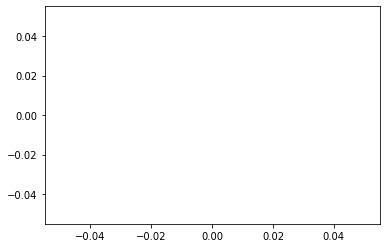

In [66]:
sns.scatterplot(km.labels_)